<a href="https://colab.research.google.com/github/Camilaaoko/Employee_Database_analysis/blob/main/Employee_database_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pandas matplotlib seaborn

In [16]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Finding average salary by department
**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
#grouping salry by department and calculating avrage salary
average_salary = df.groupby('Department')["MonthlyIncome"].mean().reset_index()

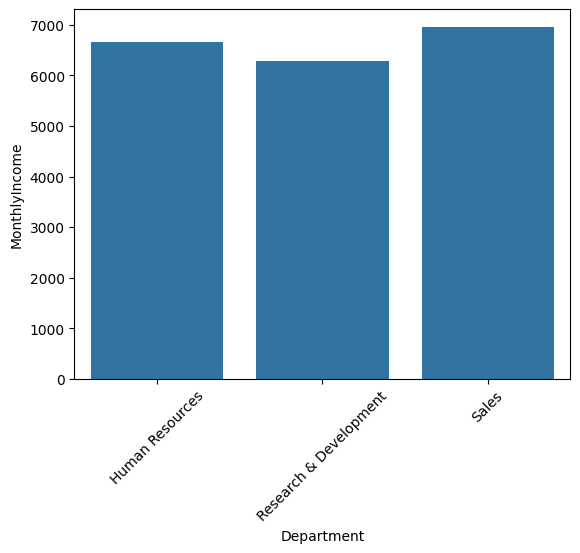

<Figure size 640x480 with 0 Axes>

In [18]:
#Viualization
sns.barplot(data = average_salary, x="Department", y="MonthlyIncome")
plt.title=("Averge Monthly salary by Department")
plt.ylabel=("Average monthly income")
plt.xticks(rotation = 45)
plt.show()
plt.savefig("average monthly salary.pdf")

**Identify employees due for promotion**
Check employees who have been promoted in the last three years or more
perfornce rating >=4


In [19]:
due_for_promotion =df[df['YearsSinceLastPromotion'] > 3]
due_for_promotion[['EmployeeNumber', 'Department', 'JobRole', 'YearsSinceLastPromotion']]


,EmployeeNumber,Department,JobRole,YearsSinceLastPromotion
9,13,Research & Development,Healthcare Representative,7
12,16,Research & Development,Research Scientist,4
15,20,Research & Development,Manufacturing Director,8
25,32,Research & Development,Manager,4
26,33,Research & Development,Research Scientist,6
...,...,...,...,...
1432,2017,Research & Development,Research Director,6
1443,2031,Research & Development,Manager,4
1444,2032,Research & Development,Laboratory Technician,9
1447,2036,Sales,Sales Executive,11


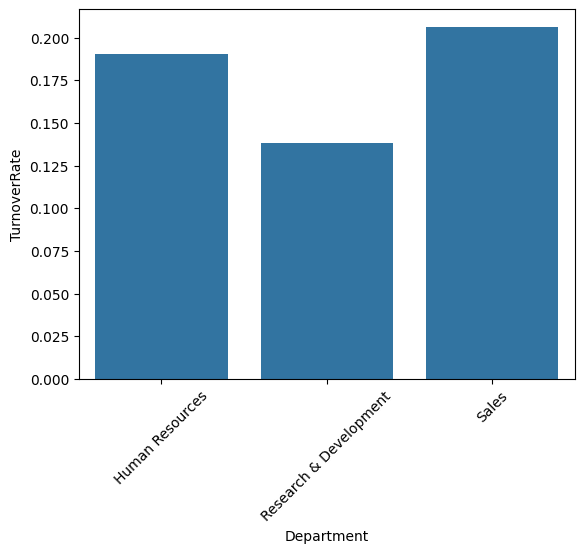

<Figure size 640x480 with 0 Axes>

In [20]:
# Calculate turnover rate
turnover_rate = df[df['Attrition'] == 'Yes'].groupby('Department').size() / df.groupby('Department').size()
turnover_rate = turnover_rate.reset_index(name='TurnoverRate')

# Visualize
sns.barplot(data=turnover_rate, x='Department', y='TurnoverRate')
plt.title=("Turnover Rate by Department")
plt.ylabel=("Turnover Rate")
plt.xticks(rotation=45)
plt.show()
plt.savefig("Turnover rate by department.pdf")
